In [27]:
import os
import argparse
import numpy as np
import ipdb
import torch
import IPython
import yaml
from sklearn.preprocessing import normalize
import pickle as pkl
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

In [2]:
global CFG
with open("../../config.yaml", "r") as ymlfile:
    CFG = yaml.load(ymlfile, Loader=yaml.SafeLoader)


In [14]:
description =  "disc_poly_ft_avg_matMul_bs512"

In [15]:
tgt_file = os.path.join(CFG["datadir"], "OUTPUTS_" + description + ".pkl")
with open(tgt_file, 'rb') as f:
    outputs = pkl.load(f)

In [45]:
cie_preds, cie_labels = torch.argmax(outputs["preds"]["cie"], dim=1), outputs["labels"]["cie"] 
clus_preds, clus_labels = torch.argmax(outputs["preds"]["clus"], dim=1) + 207, outputs["labels"]["clus"] 
dpt_preds, dpt_labels = torch.argmax(outputs["preds"]["dpt"], dim=1) + 237, outputs["labels"]["dpt"] 

In [46]:
cie_cm = confusion_matrix(cie_preds, cie_labels)
clus_cm = confusion_matrix(clus_preds, clus_labels)
dpt_cm = confusion_matrix(dpt_preds, dpt_labels)

Text(0.5, 1.0, 'AVG clus Confusion Matrix')

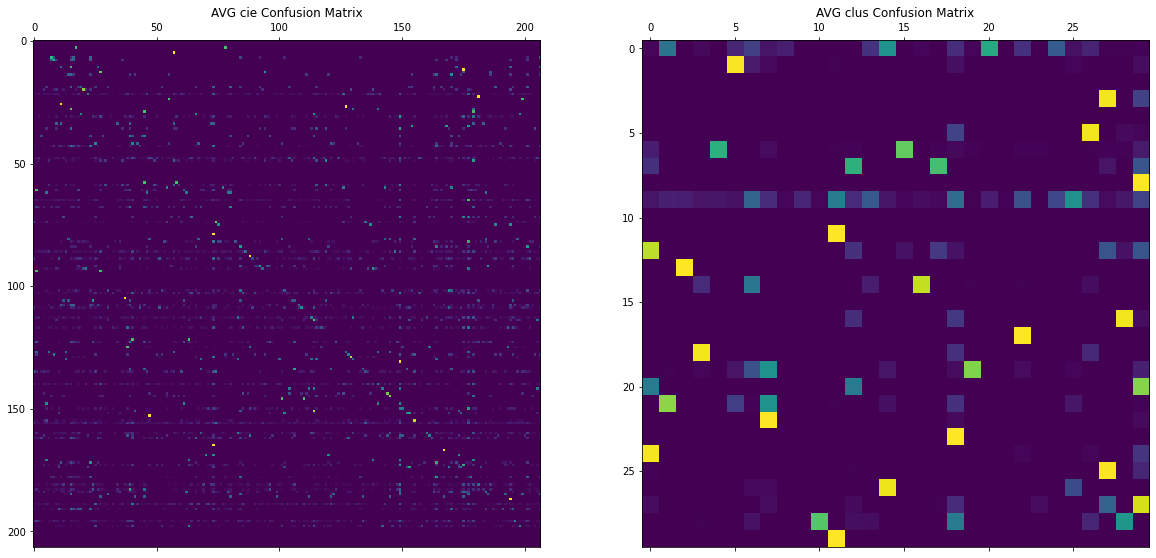

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(20, 40))
cax = ax[0].matshow(normalize(cie_cm))
ax[0].set_title("AVG cie Confusion Matrix")
cax = ax[1].matshow(normalize(clus_cm))
ax[1].set_title("AVG clus Confusion Matrix")


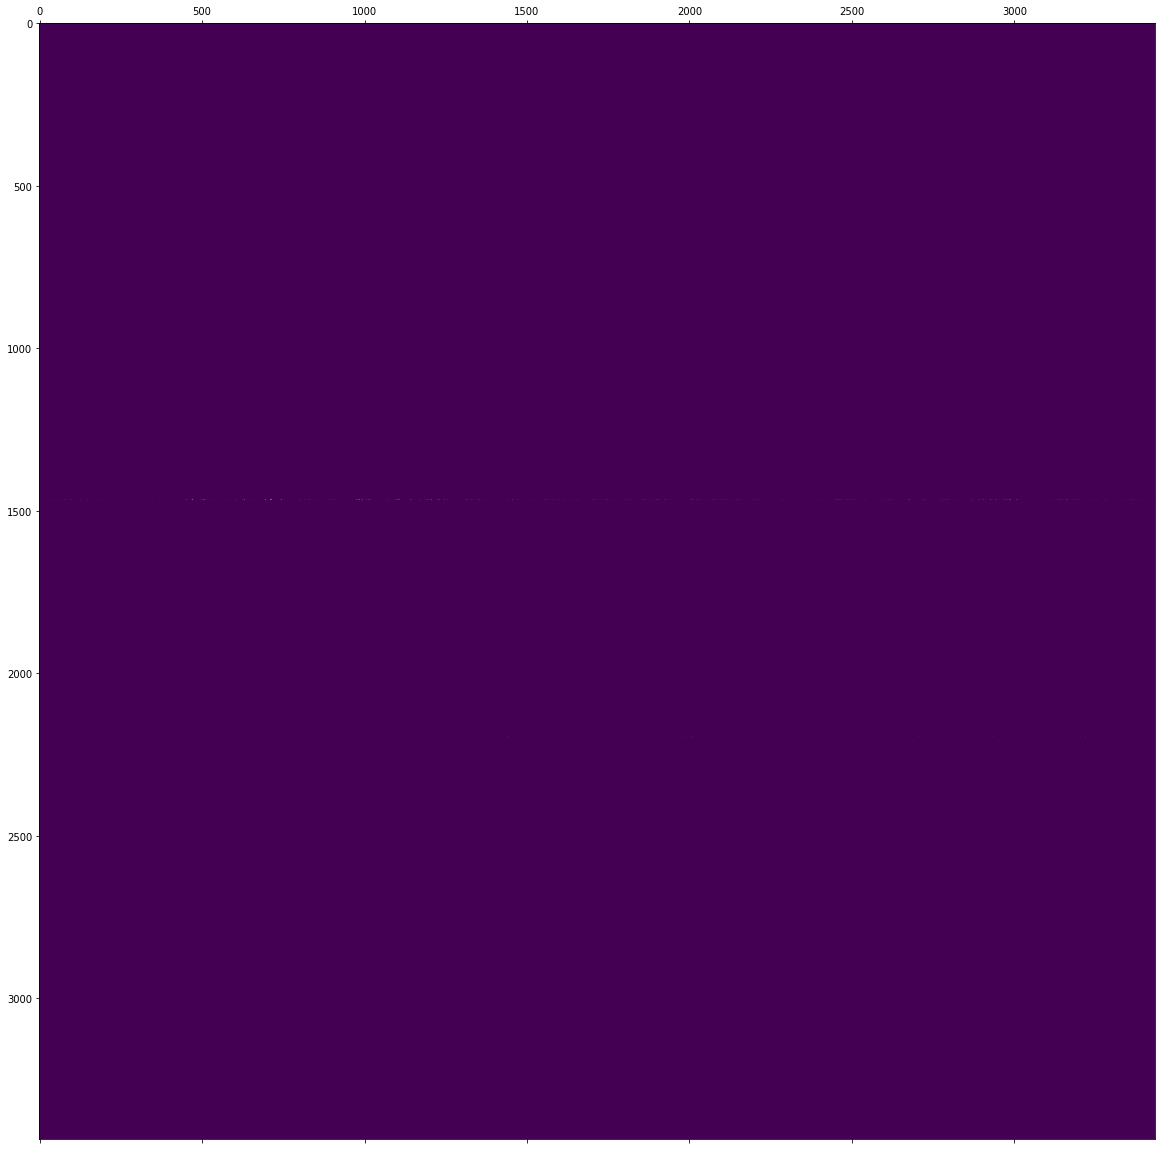

In [59]:
fig, ax = plt.subplots(1, figsize=(20, 40))
cax = ax.matshow(dpt_cm)

In [65]:
dpt_cm


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
datasets = load_datasets(["TRAIN"], True)
dataset_train = datasets[0]
in_size, out_size = get_model_params(dataset_train.rep_dim, len(dataset_train.bag_rep))

arguments = {'in_size': in_size,
             'out_size': out_size,
             'hparams': None,
             'dataset': dataset_train,
             'datadir': CFG["gpudatadir"],
             'desc': xp_title,
             "middle_size": middle_size}

print("Initiating model with params (" + str(in_size) + ", " + str(out_size) + ")")
model = InstanceClassifierDisc(**arguments)
print("Model Loaded.")

NameError: name 'DiscriminativePolyvalentDataset' is not defined

In [4]:
data = {}
for data_agg_type in data_agg_type:
    file_path = os.path.join(CFG["datadir"], "OUTPUTS_" +
                                 model_type + "_" +
                                 rep_type + "_" +
                                 data_agg_type + "_" +
                                 input_type +
                                 "_bs" + str(b_size) + ".pkl")
    with open(file_path, 'rb') as f:
        data[data_agg_type] = pkl.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '/local/gainondefor/work/lip6/data/companies/OUTPUTS_disc_poly_ft_avg_matMul_bs512.pkl'

In [22]:
avg_cie_cm = data["avg"]["cie"]['cm']
avg_clus_cm = data["avg"]["clus"]['cm']
avg_dpt_cm = data["avg"]["dpt"]['cm']

max_cie_cm = data["max"]["cie"]['cm']
max_clus_cm = data["max"]["clus"]['cm']
max_dpt_cm = data["max"]["dpt"]['cm']

sum_cie_cm = data["sum"]["cie"]['cm']
sum_clus_cm = data["sum"]["clus"]['cm']
sum_dpt_cm = data["sum"]["dpt"]['cm']

print(max_cie_cm.shape)
print(max_clus_cm.shape)
print(max_dpt_cm.shape)

(205, 205)
(30, 30)
(3497, 3497)


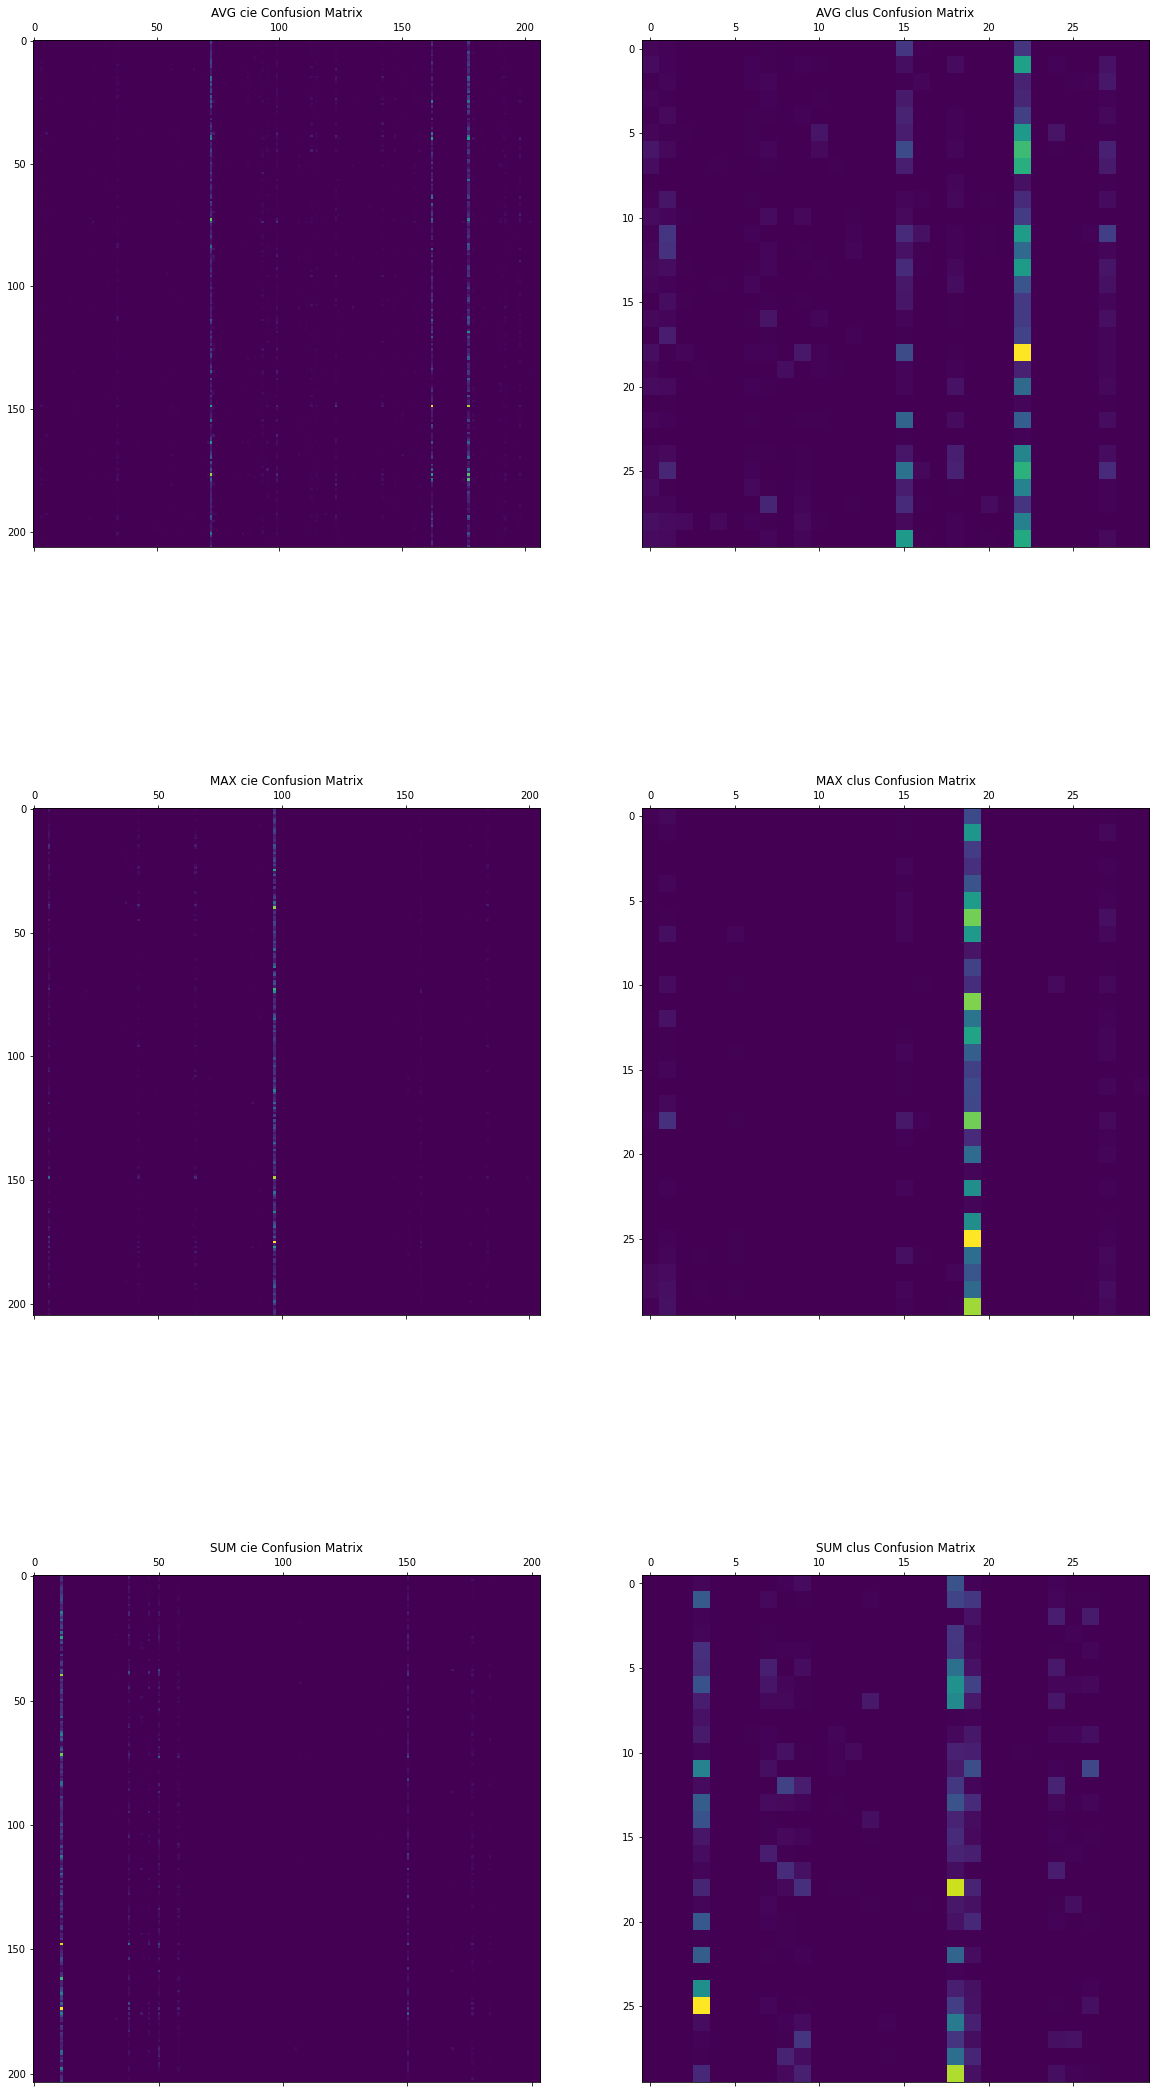

In [25]:
fig, ax = plt.subplots(3, 2, figsize=(20, 40))
cax = ax[0,0].matshow(normalize(avg_cie_cm))
ax[0,0].set_title("AVG cie Confusion Matrix")
cax = ax[0,1].matshow(normalize(avg_clus_cm))
ax[0,1].set_title("AVG clus Confusion Matrix")
# cax = ax[0,2].matshow(normalize(avg_dpt_cm))
# ax[0,2].set_title("AVG dpt Confusion Matrix")

cax = ax[1,0].matshow(normalize(max_cie_cm))
ax[1,0].set_title("MAX cie Confusion Matrix")
cax = ax[1,1].matshow(normalize(max_clus_cm))
ax[1,1].set_title("MAX clus Confusion Matrix")
# cax = ax[1,2].matshow(normalize(max_dpt_cm))
# ax[1,2].set_title("MAX dpt Confusion Matrix")

cax = ax[2,0].matshow(normalize(sum_cie_cm))
ax[2,0].set_title("SUM cie Confusion Matrix")
cax = ax[2,1].matshow(normalize(sum_clus_cm))
ax[2,1].set_title("SUM clus Confusion Matrix")
# cax = ax[2,2].matshow(normalize(sum_dpt_cm))
# ax[2,2].set_title("SUM dpt Confusion Matrix")
plt.show()

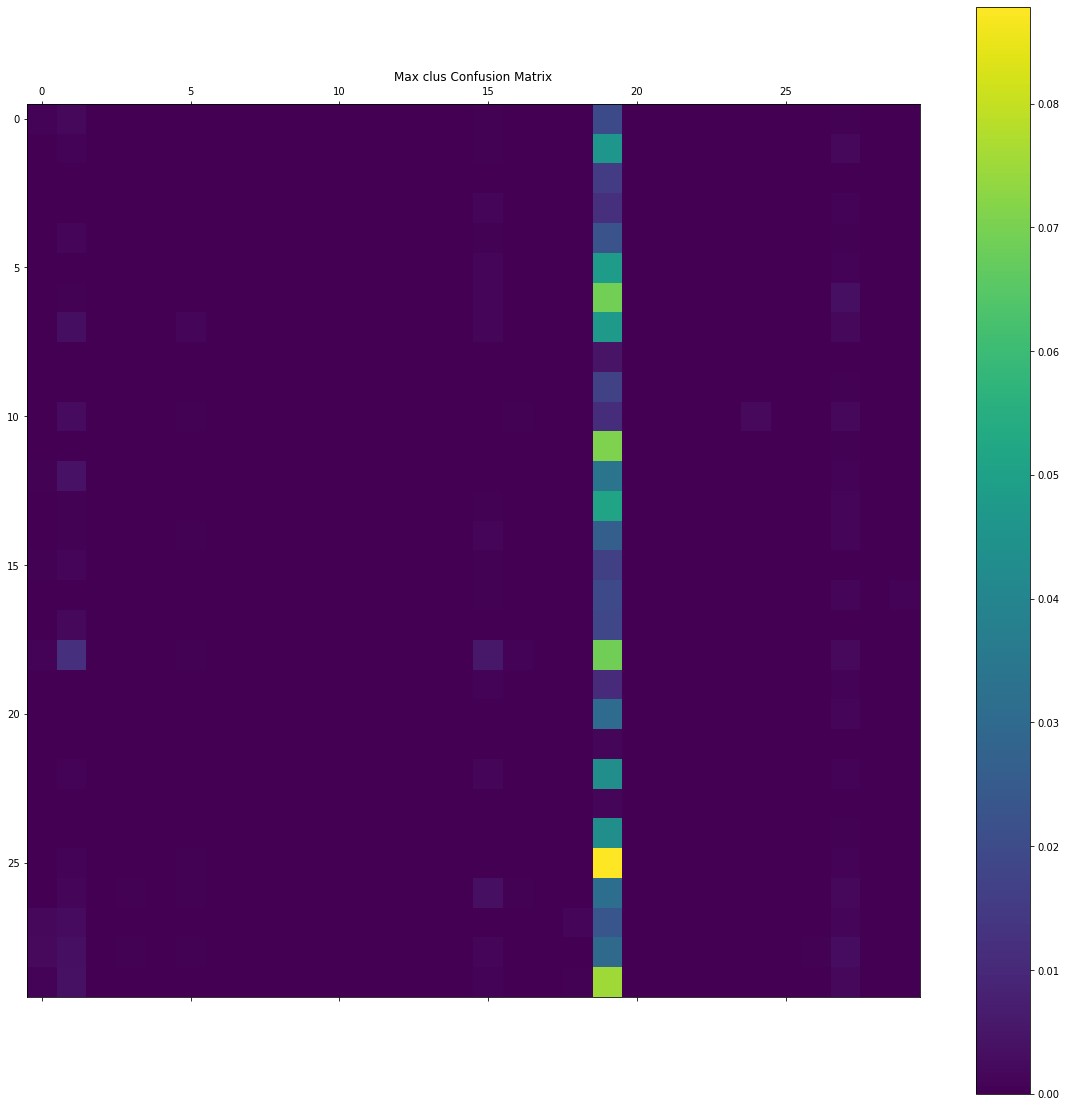

In [8]:
fig, ax = plt.subplots(figsize=(20, 20))
cax = ax.matshow(normalize(max_clus_cm))
fig.colorbar(cax)
ax.set_title("Max clus Confusion Matrix")
plt.show()

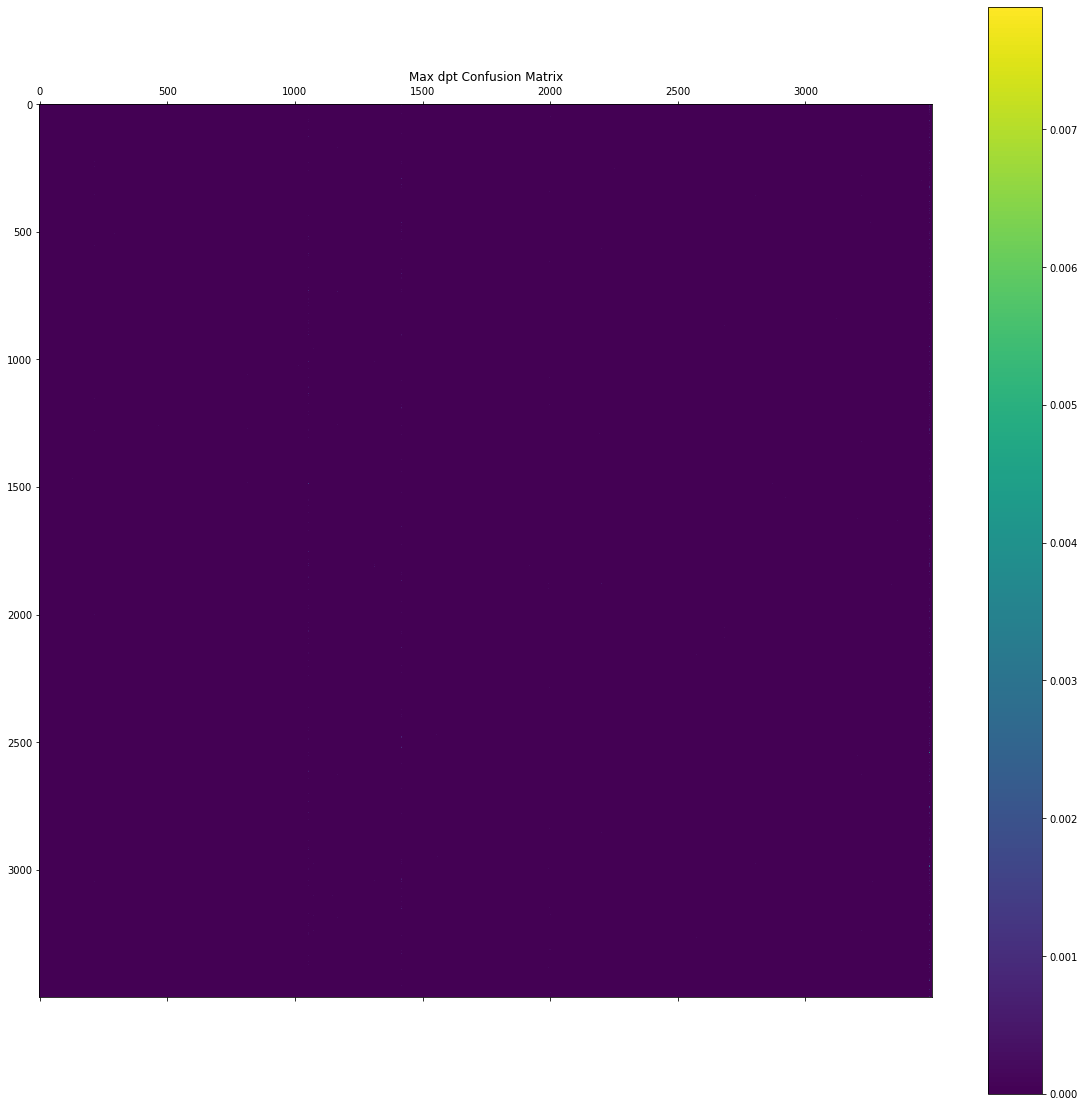

In [9]:
fig, ax = plt.subplots(figsize=(20, 20))
cax = ax.matshow(normalize(max_dpt_cm))
fig.colorbar(cax)
ax.set_title("Max dpt Confusion Matrix")
plt.show()